## import module__

In [1]:
# Import necessary libraries for data manipulation, visualization, and statistical operations

import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data management and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn for making statistical graphics
import scipy.optimize as opt  # SciPy for optimization algorithms
import scipy.stats as stats  # SciPy for statistical functions
from scipy.stats import randint  # Importing randint for generating random integers

# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Suppress warnings for cleaner output
import warnings  # Warnings module to control warning messages
warnings.filterwarnings("ignore")  # Ignore all warnings

## dataframe__

In [2]:
# This code reads a CSV file containing heart attack data into a pandas DataFrame and displays the first few rows.
ha_df = pd.read_csv('heart.csv')
ha_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## data understanding__

In [3]:
ha_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### all columns explanation 🩺🩻🩸.
* <b>age</b>: age of the patient
* <b>sex</b> : sex of the patient
* <b>cp</b> : chest pain type <br>
0 = typical angina <br>
1 = atypical angina<br>
2 = non-anginal pain<br>
3 = asymptomatic

* <b>trtbps</b> : resting blood pressure in mm Hg
* <b>chol</b> : cholestoral in mg/dl
* <b>exng</b> : exercise induced angina <br> 
1 = yes <br>
0 = no

* <b>fbs</b> : fasting blood sugar > 120 mg/dl <br>
1 = true <br>
0 = false

* <b>restecg</b> : resting electrocardiographic results <br>
0 = normal <br>
1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

* <b>thalachh</b> : maximum heart rate achieved
* <b>slp</b> : slope
* <b>caa</b> : number of major vessels
* <b>thall</b> : thalium stress test result
* <b>target</b> : <br>
0 = less chance of heart attack <br>
1 = more chance of heart attack

## data preparation__

In [4]:
# value checking
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# from the data understanding we got
categoric_cols = ['sex', 'cp', 'fbs', 'restecg', 
                  'exng', 'slp', 'caa', 'thall']

In [6]:
# This loop iterates through each categorical column in the list categoric_cols.
# It prints the unique values and their counts for each column in the DataFrame ha_df, 
# sorted by index, providing insights into the distribution of categorical data.

for i in categoric_cols:
     print('all value in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
     print('\n')

all value in column sex : 
sex
0     96
1    207
Name: count, dtype: int64


all value in column cp : 
cp
0    143
1     50
2     87
3     23
Name: count, dtype: int64


all value in column fbs : 
fbs
0    258
1     45
Name: count, dtype: int64


all value in column restecg : 
restecg
0    147
1    152
2      4
Name: count, dtype: int64


all value in column exng : 
exng
0    204
1     99
Name: count, dtype: int64


all value in column slp : 
slp
0     21
1    140
2    142
Name: count, dtype: int64


all value in column caa : 
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


all value in column thall : 
thall
0      2
1     18
2    166
3    117
Name: count, dtype: int64




### outliers

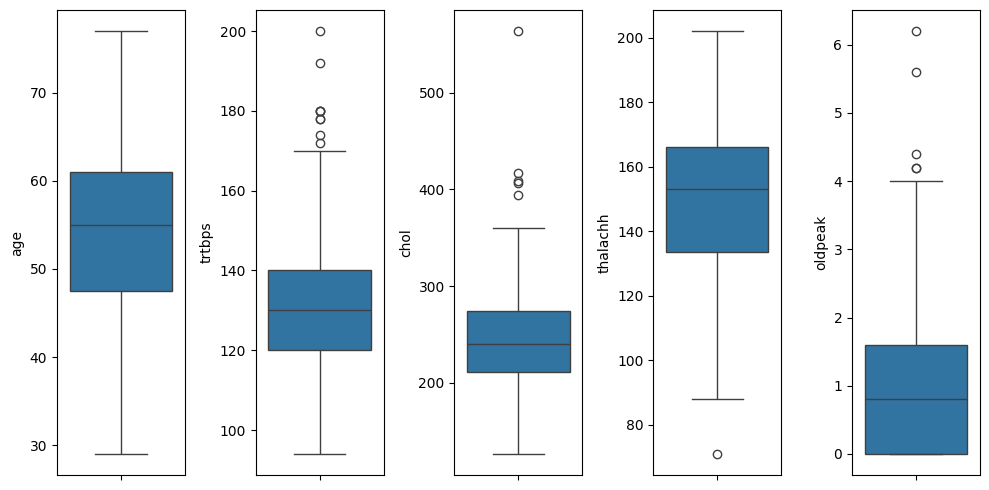

In [7]:
# This code visualizes the distribution of specific features from the heart attack dataset using boxplots.

col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))  # Set the figure size for the plots.
for i in range(0,len(col_num)):  # Iterate through the columns to create subplots.
    plt.subplot(1,len(col_num),i+1)  # Create a subplot for each column.
    sns.boxplot(y=ha_df[col_num[i]])  # Generate a boxplot for the current column.
    plt.tight_layout()  # Adjust subplot parameters to give specified padding.

In [8]:
for i in col_num:
    Q1 = ha_df[i].quantile(0.25) 
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1 
    LowerBound = Q1 - (1.5 * IQR) 
    UpperBound = Q3 + (1.5 * IQR) 
    
    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

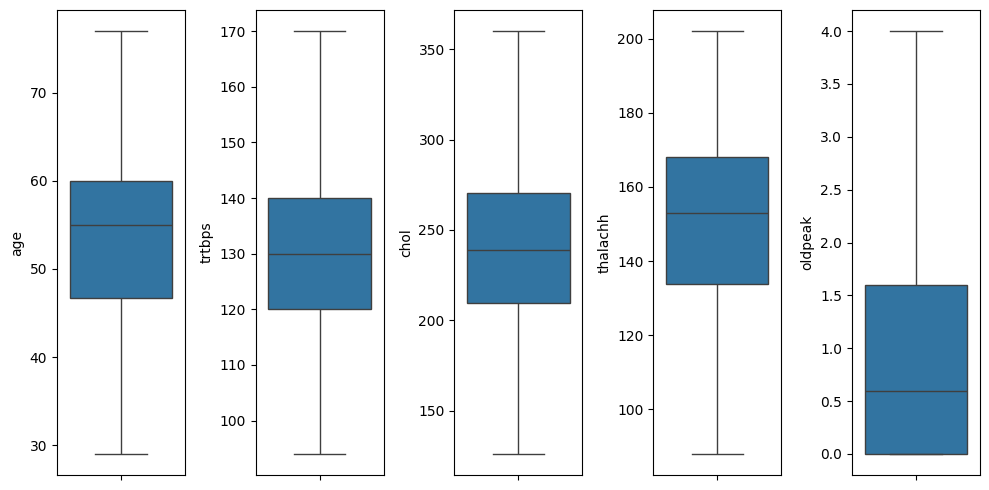

In [9]:
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

In [10]:
ha_df.shape

(284, 14)

### missing value

In [11]:
ha_df.isna().sum()

#make a loop saying done 4 times and then say "you are done"

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### duplicate data

In [12]:
ha_df.duplicated().sum()

1

In [13]:
ha_df = ha_df.drop_duplicates()

In [14]:
ha_df.duplicated().sum()

0

## exploratory data analysis__

In [15]:
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
trtbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
thalachh,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


In [16]:
df = ha_df

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### count plot

In [18]:
count = ['sex', 'cp', 'fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']

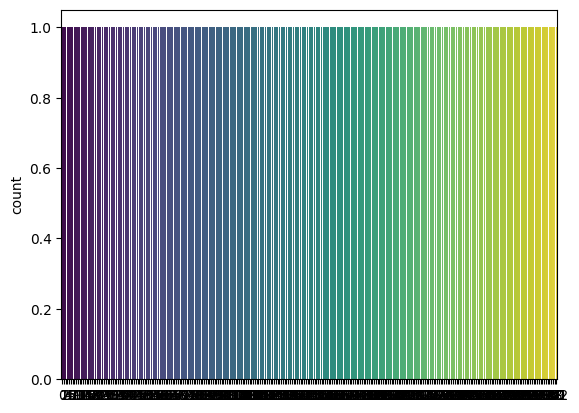

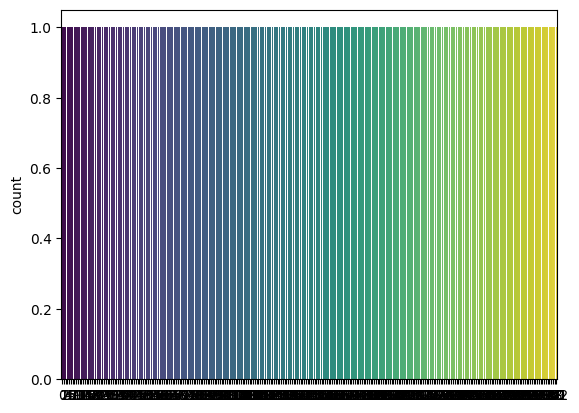

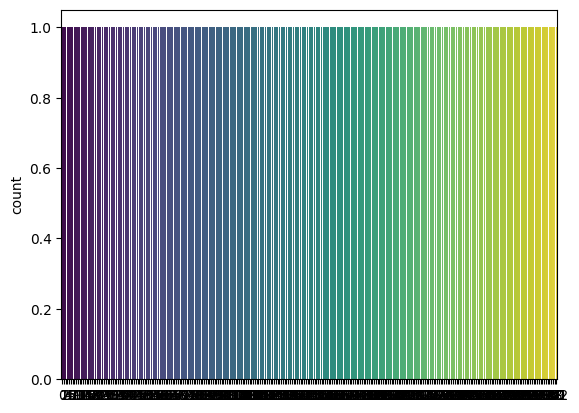

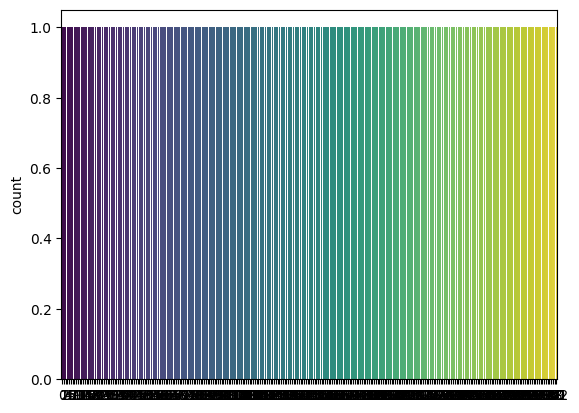

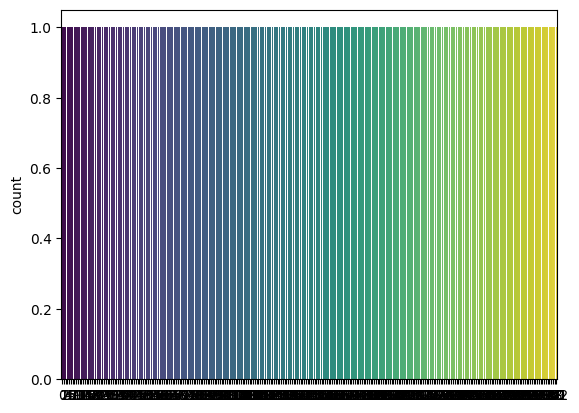

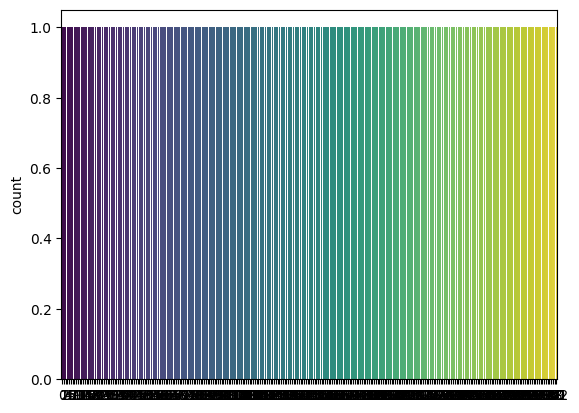

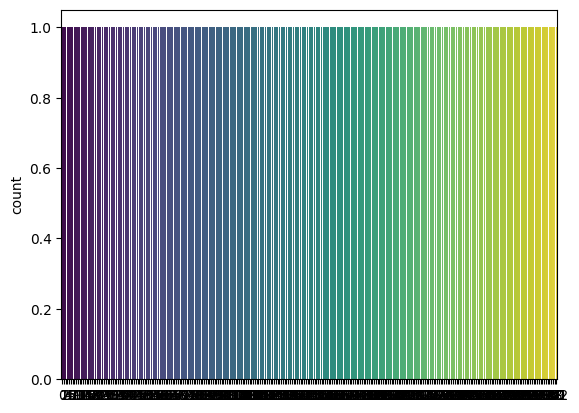

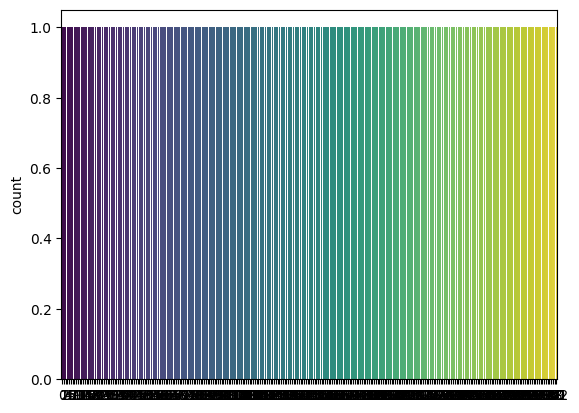

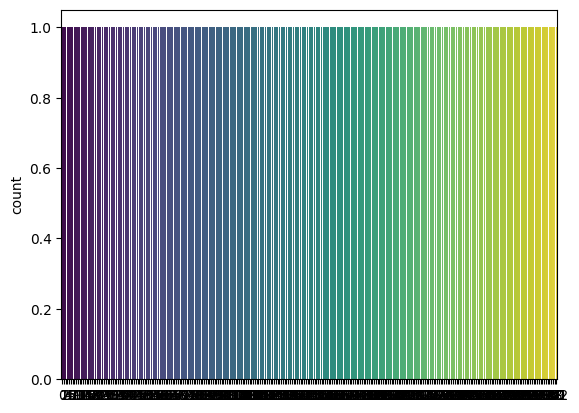

In [19]:
for i in count:
    sns.countplot(df[i], palette = 'viridis')
    plt.show()

### histogram

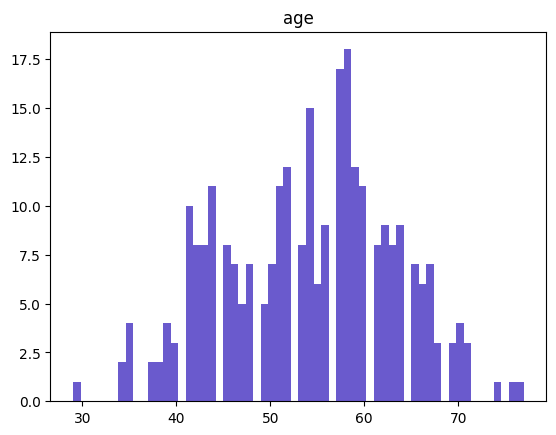

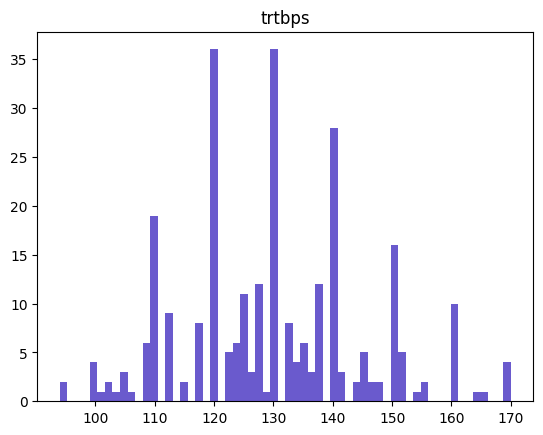

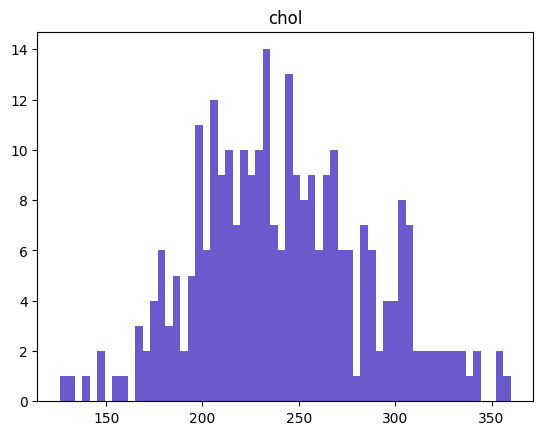

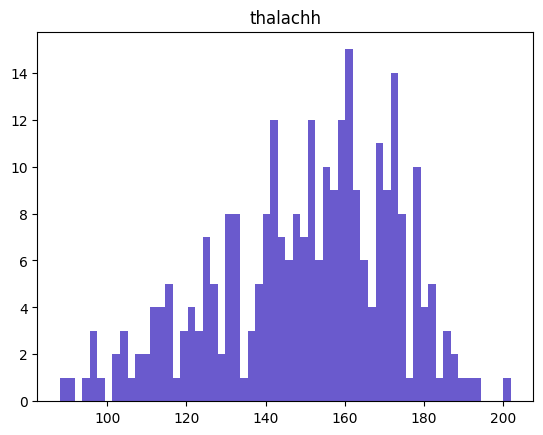

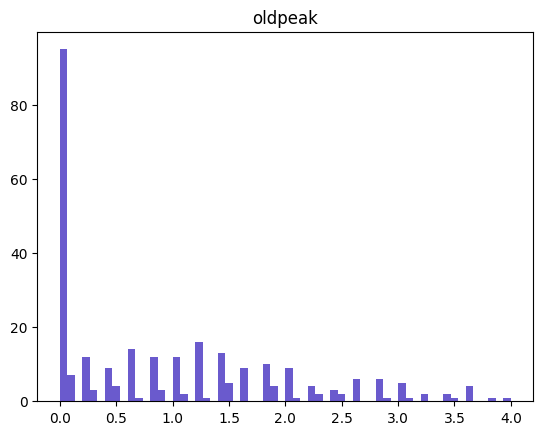

In [20]:
i = ['age', 'trtbps', 'chol','thalachh','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

## checking for multicollinearity__ / featureselection

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trtbps,67.479395
7,thalachh,49.071486
0,age,41.433818
4,chol,32.397241
12,thall,17.597185
10,slp,10.237501
13,output,4.558433
1,sex,4.022971
9,oldpeak,2.998900
2,cp,2.615809


In [22]:
# drop column 'trtbps' (vif > 11)
df.drop(columns = ['trtbps'], inplace = True)

In [23]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
6,thalachh,40.229316
3,chol,31.225076
0,age,29.612135
11,thall,17.532569
9,slp,10.231212
12,output,4.558241
1,sex,4.001104
8,oldpeak,2.941578
2,cp,2.596913
5,restecg,2.164959


In [24]:
# drop column 'thalachh' (vif > 11)
df.drop(columns = ['thalachh'], inplace = True)

In [25]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
0,age,28.887183
3,chol,26.287462
10,thall,16.339419
8,slp,9.095234
11,output,4.045895
1,sex,3.765843
7,oldpeak,2.912625
2,cp,2.553355
5,restecg,2.148942
6,exng,2.016190


In [26]:
# drop column 'age' (vif > 11)
df.drop(columns = ['age'], inplace = True)

In [27]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
2,chol,17.937794
9,thall,15.369374
7,slp,8.911986
10,output,3.937079
0,sex,3.762219
6,oldpeak,2.713075
1,cp,2.532267
4,restecg,2.144378
5,exng,2.007930
8,caa,1.853003


In [28]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['chol'], inplace = True)

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
8,thall,10.628714
6,slp,7.524873
0,sex,3.757474
9,output,3.713174
5,oldpeak,2.557867
1,cp,2.512613
3,restecg,2.135752
4,exng,1.946123
7,caa,1.828787
2,fbs,1.220503


In [30]:
df.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')

Pearson Correlation,


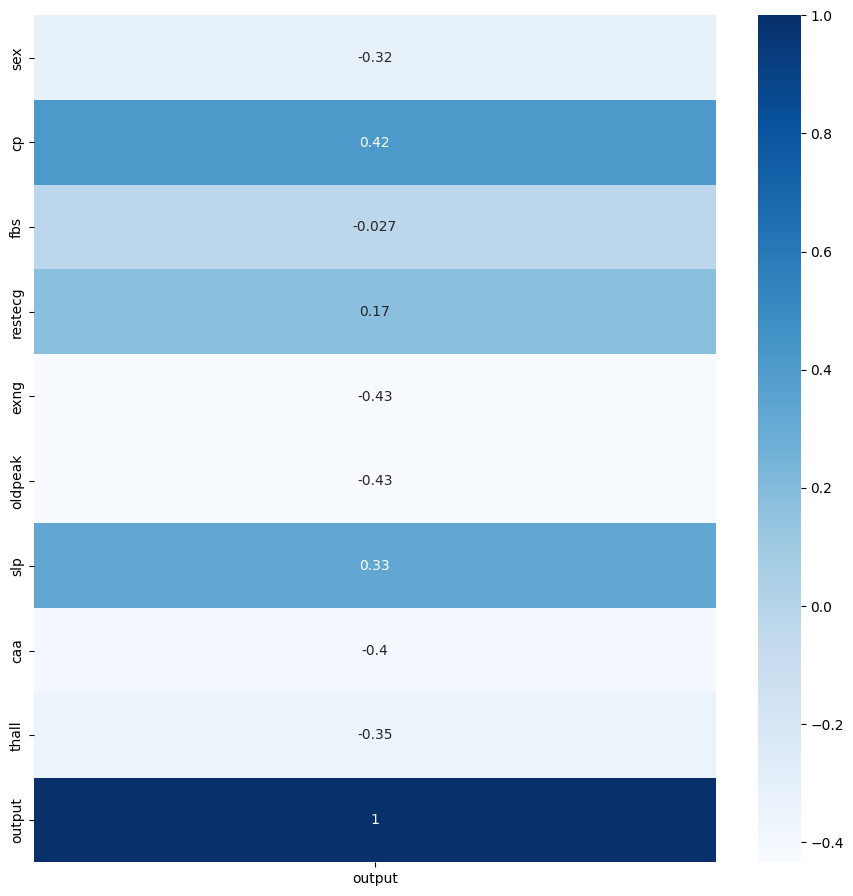

abs corr score: 
sex        0.318896
cp         0.416319
fbs        0.027210
restecg    0.171453
exng       0.431599
oldpeak    0.434108
slp        0.326473
caa        0.397733
thall      0.349150
Name: output, dtype: float64


mean 0.31921551302804485


feature selection result: 
cp         0.416319
exng       0.431599
oldpeak    0.434108
slp        0.326473
caa        0.397733
thall      0.349150
Name: output, dtype: float64


In [31]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['output'][0:-1]))
cor['output'] = cor['output'][0:-1]
margin = abs(cor['output'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['output'][0:-1])[abs(cor['output']) > margin]
print(fs)

In [32]:
df = df.drop(columns = ['sex', 'fbs', 'restecg', 'slp'])

In [33]:
df.columns

Index(['cp', 'exng', 'oldpeak', 'caa', 'thall', 'output'], dtype='object')

In [34]:
df.head()

,cp,exng,oldpeak,caa,thall,output
0,3,0,2.3,0,1,1
1,2,0,3.5,0,2,1
2,1,0,1.4,0,2,1
3,1,0,0.8,0,2,1
4,0,1,0.6,0,2,1


## train test split__

In [35]:
X = df.drop(columns=['output'])
y = df['output']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## hypertuning__

In [36]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'C': [0.1, 1, 10],
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [1,2,3,4,5,6,7,8,9,10,None],
            'criterion' :['gini', 'entropy']
        }
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'C': [0.1, 1, 10],
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    }
    }
scores = []

from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train) 
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.836433,"{'C': 0.1, 'multi_class': 'auto', 'penalty': '..."
1,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 7, 'max_fea..."
2,SVM_Classifier,0.845205,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"


## modelling__

### 1 Logistic Regression

In [37]:
best.best_params[0]

{'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [38]:
model = LogisticRegression(solver = 'newton-cg',
                           penalty = 'l2', 
                           multi_class = 'auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

#import seaborn as sns
#sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
#plt.show()


from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

[[23  4]
 [ 3 27]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.87      0.90      0.89        30

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57



### 2 Decision Tree

In [40]:
best.best_params[1]

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [41]:
model = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 5,
                               max_features = 'log2',
                               splitter = 'best')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

#import seaborn as sns
#sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
#plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

[[19  8]
 [ 4 26]]


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.76      0.87      0.81        30

    accuracy                           0.79        57
   macro avg       0.80      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



### 3 SVM

In [43]:
best.best_params[2]

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [44]:
model = SVC(gamma = 'auto', kernel = 'rbf')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

In [45]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_predict))

#import seaborn as sns
#sns.heatmap(confusion_matrix(y_test, y_predict3), annot = True)
#plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

[[20  7]
 [ 2 28]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.80      0.93      0.86        30

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.85      0.84      0.84        57



### Testing










In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_predict = best_model.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_predict))

accuracy = accuracy_score(y_test, y_predict)
print('Logistic Regression Accuracy:', round(accuracy, 2))


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.8452173913043479
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.88      0.97      0.92        30

    accuracy                           0.91        57
   macro avg       0.92      0.91      0.91        57
weighted avg       0.92      0.91      0.91        57

Logistic Regression Accuracy: 0.91


In [47]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'max_iter': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None,1,2,3,4,5,6,7,8,9, 10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_predict = best_model.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_predict))


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'max_iter': 100}
Best Score: 0.8452173913043479
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.85      0.93      0.89        30

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.88        57
weighted avg       0.88      0.88      0.88        57

